In [ ]:
! nvidia-smi

Mon May 30 07:26:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! git clone https://github.com/AlexeyAB/darknet.git

In [ ]:
! head darknet/Makefile

參數說明 GPU=1 調用 GPU CUDA CUDNN=1 調用 cuDNN v5-v7 加速訓練 CUDNN_HALF=1 調用 Tensor Cores (適用於 Titan V / Tesla V100 / DGX-2 and later) 偵測加速 3 倍, 訓練加速 2 倍 OPENCV=1 調用 OpenCV 3.x/2.4.x - 用於攝影機偵測用

In [ ]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

In [ ]:
! head darknet/Makefile

In [ ]:
! cd darknet; make

In [ ]:
! cd darknet ; ./darknet 

In [ ]:
! wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
! ls darknet/data

In [ ]:
from PIL import Image
Image.open('darknet/data/dog.jpg')

In [ ]:
! cd darknet; ./darknet detect /content/darknet/cfg/yolov4.cfg  /content/yolov4.weights /content/darknet/data/dog.jpg

In [ ]:
Image.open('/content/darknet/predictions.jpg')

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
upload()

Saving drive-download-20220523T083449Z-001.zip to drive-download-20220523T083449Z-001.zip
saved file drive-download-20220523T083449Z-001.zip


In [ ]:
!unzip './drive-download-20220523T083449Z-001'

Archive:  ./drive-download-20220523T083449Z-001.zip
  inflating: 測試/11.jpg           
  inflating: 訓練/20.jpg           
  inflating: 訓練/19.jpg           
  inflating: 訓練/4.jpg            
  inflating: 訓練/6.jpg            
  inflating: 訓練/8.jpg            
  inflating: 訓練/7.jpg            
  inflating: 訓練/18.jpg           
  inflating: 訓練/9.jpg            
  inflating: 訓練/5.jpg            
  inflating: 測試/18.jpg           
  inflating: 測試/1.jpg            
  inflating: 測試/7.jpg            
  inflating: 測試/6.jpg            
  inflating: 測試/14.jpg           
  inflating: 訓練/16.jpg           
  inflating: 訓練/2.jpg            
  inflating: 訓練/3.jpg            
  inflating: 測試/12.jpg           
  inflating: 測試/Container code.mp4  
  inflating: 測試/17.jpg           
  inflating: 測試/9.jpg            
  inflating: 測試/13.jpg           
  inflating: 測試/16.jpg           
  inflating: 測試/4.jpg            
  inflating: 測試/15.jpg           
  inflating: 測試/5.jpg            
  inflating: 測試/3.jpg      

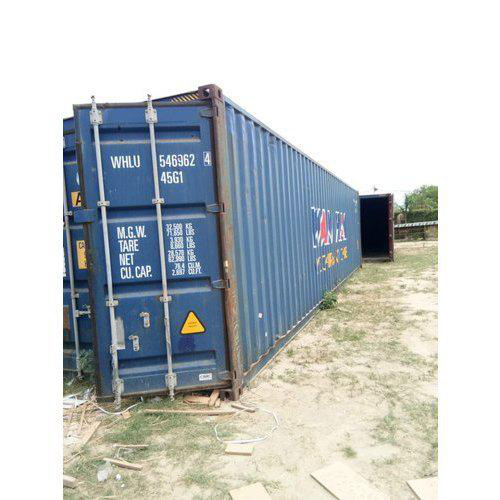

In [ ]:
from PIL import Image
Image.open('./訓練/10.jpg')


PaddleOCR貨櫃號碼識別

In [ ]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 689.6 MB 18 kB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 4.9 MB/s 
     |████████████████████████████████| 948 kB 53.9 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 55.7 MB 53 kB/s 
     |████████████████████████████████| 2.7 MB 50.2 MB/s 
     |████████████████████████████████| 603 kB 56.3 MB/s 
     |████████████████████████████████| 404 kB 65.6 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 199 kB 76.5 MB/s 
     |████████████████████████████████| 127 kB 65.7 MB/s 
     |████████████████████████████████| 2.1 MB 47.2 MB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 596 kB 64.1 MB/s 
     |████████████████████████████████| 8

In [ ]:
from paddleocr import PaddleOCR,draw_ocr
from matplotlib import pyplot as plt 
import cv2 #opencv
import os 

/usr/local/lib/python3.7/dist-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To si

In [ ]:
# Setup model
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr_model = PaddleOCR(lang='en',use_gpu=False) # need to run only once to download and load model into memory
img_path = './訓練/12.jpg'
result = ocr_model.ocr(img_path, cls=True)
for line in result:
    print(line)

[2022/05/30 08:11:39] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [ ]:
for res in result:
    print(res[1][0])

WFHU
1260059
22G1
www.WFCL.us
MAX.GROSS
30.480 kg.
67,200Ib.
TARE
2,70kg.
4,790Ib.
NET
28,310 kg.
62,410 Ib.
CU.CAP.
33.2 cu.m.
1,173 cu.ft.


In [ ]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./ppocr_img/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

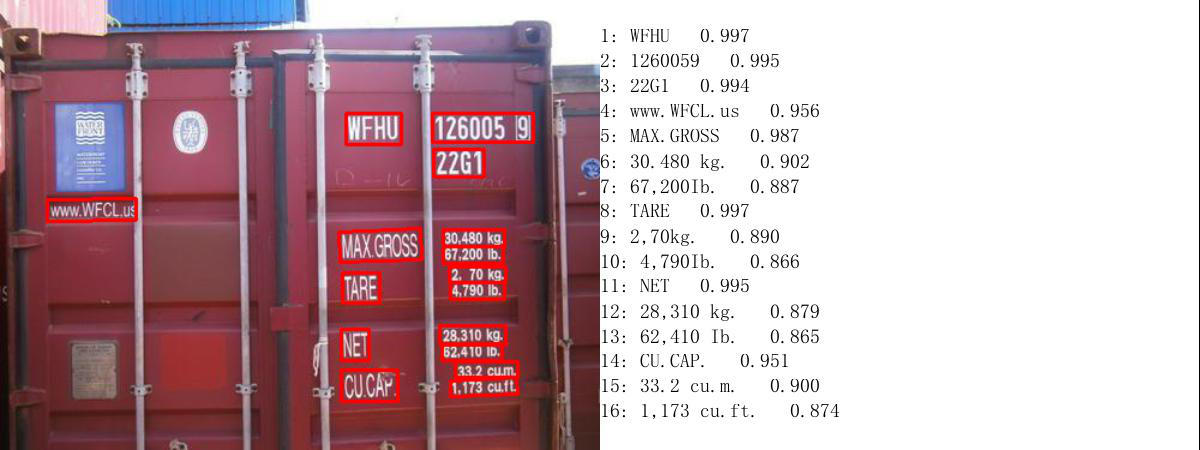

In [ ]:
Image.open('result.jpg')